### 퍼셉트론의 이해 (추가)

<img src="./img/c17.jpg" width=80% height=80%>


과거 퍼셉트론 모델에서는 Activation 펑션이 step funtion이 되어야 한다는 고정관념이 있었다.

- Activation (활성하 함수)
- Sigmodi, tanh, ReLU, Leaky ReLU, Maxout, ELU 등

<img src="./img/c18.png" width=80% height=80%>

- 하지만 이런 구조에서 문제가 생김.

### Vanishing Gradient (기울기 소멸 문제)

- loss 값이 낮아지는 방향으로 이동하는 과정에서, activation 을 통해 0~1 사이 값으로 바뀌어서 큰 신호와 작은 신호의 구분히 모호해짐.
- 이 상태로 층을 지나갈 수록 뒤로 전해지지 않음. (깊게 학습하지 못함)
- 깊게 학습시키지 못하면 정확도가 떨어짐

---

### VGG Net

- 220405 / CNN[(4)]

유명해진 이유 : 2014년 출시 => 너무 쉬워서

<img src="./img/c19.png" width=100% height=100%>

- (224, 224) 입력 : (3, 3) * 64 Conv
- (224, 224) 입력 : (3, 3) * 64 Conv
- pool => 1/2
- (112, 112) 입력 : (3, 3) * 128 Conv
- (112, 112) 입력 : (3, 3) * 128 Conv
- pool => 1/2
- (56, 56) 입력 : (3, 3) * 256 Conv
- (56, 56) 입력 : (3, 3) * 256 Conv
- (56, 56) 입력 : (3, 3) * 256 Conv
- pool => 1/2
- (28, 28) 입력 : (3, 3) * 512 Conv
- (28, 28) 입력 : (3, 3) * 512 Conv
- (28, 28) 입력 : (3, 3) * 512 Conv
- pool => 1/2
- Flatten : 

<img src="./img/c20.png" width=50% height=50%>

- 3x3  convolution, stride 1 활용
- 간단한 구조로 좋은 성과를 내었다.
- 파라미터의 개수가 많다

---


In [1]:
import tensorflow as tf

# 사이파 텐 이미지

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [8]:
# 코드 구현

X = tf.keras.Input(shape=[32, 32, 3])

H = tf.keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="swish")(X)
H = tf.keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="swish")(H)
H = tf.keras.layers.MaxPool2D()(H)

H1 = tf.keras.layers.Conv2D(128, kernel_size=3, padding="same", activation="swish")(H)
H1 = tf.keras.layers.Conv2D(128, kernel_size=3, padding="same", activation="swish")(H1)
H1 = tf.keras.layers.MaxPool2D()(H1)

H2 = tf.keras.layers.Conv2D(512, kernel_size=3, padding="same", activation="swish")(H1)
H2 = tf.keras.layers.Conv2D(512, kernel_size=3, padding="same", activation="swish")(H2)
H2 = tf.keras.layers.Conv2D(512, kernel_size=3, padding="same", activation="swish")(H2)
H2 = tf.keras.layers.MaxPool2D()(H2)

H3 = tf.keras.layers.Conv2D(512, kernel_size=3, padding="same", activation="swish")(H2)
H3 = tf.keras.layers.Conv2D(512, kernel_size=3, padding="same", activation="swish")(H3)
H3 = tf.keras.layers.Conv2D(512, kernel_size=3, padding="same", activation="swish")(H3)
H3 = tf.keras.layers.MaxPool2D()(H3)

H4 = tf.keras.layers.Flatten()(H3)
H4 = tf.keras.layers.Dense(4096, activation="swish")(H4)
H4 = tf.keras.layers.Dense(4096, activation="swish")(H4)
H4 = tf.keras.layers.Dense(4096, activation="swish")(H4)
Y = tf.keras.layers.Dense(10, activation="softmax")(H4)

model = tf.keras.Model(X, Y)
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 4096)              1678

- 컴퓨터가 학습해야 하는 파라미터 : 5000만개

- 느림.

- 빠르게 하려면? batch

In [9]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
352/352 [==============================] - 16s 37ms/step - loss: 50.5657 - accuracy: 0.1686 - val_loss: 2.7666 - val_accuracy: 0.1262
Epoch 2/10
352/352 [==============================] - 14s 40ms/step - loss: 29.8182 - accuracy: 0.1684 - val_loss: 2.6950 - val_accuracy: 0.1578
Epoch 3/10
352/352 [==============================] - 13s 37ms/step - loss: 2.4834 - accuracy: 0.3179 - val_loss: 1.4613 - val_accuracy: 0.4638
Epoch 4/10
352/352 [==============================] - 14s 40ms/step - loss: 1.9057 - accuracy: 0.4533 - val_loss: 1.2788 - val_accuracy: 0.5586
Epoch 5/10
352/352 [==============================] - 13s 37ms/step - loss: 1.7177 - accuracy: 0.5250 - val_loss: 1.3597 - val_accuracy: 0.5648
Epoch 6/10
352/352 [==============================] - 14s 39ms/step - loss: 1.8266 - accuracy: 0.5227 - val_loss: 1.1804 - val_accuracy: 0.5934
Epoch 7/10
352/352 [==============================] - 14s 41ms/step - loss: 1.4112 - accuracy: 0.5826 - val_loss: 1.0950 - val_accurac

In [17]:
# VGG 16 코드 구현

X = tf.keras.Input(shape=[32, 32, 3])

H = tf.keras.layers.Conv2D(64, kernel_size=3, padding="same")(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)
H = tf.keras.layers.Conv2D(64, kernel_size=3, padding="same")(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)
H = tf.keras.layers.MaxPool2D()(H)

H1 = tf.keras.layers.Conv2D(128, kernel_size=3, padding="same")(H)
H1 = tf.keras.layers.BatchNormalization()(H1)
H1 = tf.keras.layers.Activation("swish")(H1)
H1 = tf.keras.layers.Conv2D(128, kernel_size=3, padding="same")(H1)
H1 = tf.keras.layers.BatchNormalization()(H1)
H1 = tf.keras.layers.Activation("swish")(H1)
H1 = tf.keras.layers.MaxPool2D()(H1)

H2 = tf.keras.layers.Conv2D(256, kernel_size=3, padding="same")(H1)
H2 = tf.keras.layers.BatchNormalization()(H2)
H2 = tf.keras.layers.Activation("swish")(H2)
H2 = tf.keras.layers.Conv2D(256, kernel_size=3, padding="same")(H2)
H2 = tf.keras.layers.BatchNormalization()(H2)
H2 = tf.keras.layers.Activation("swish")(H2)
H2 = tf.keras.layers.Conv2D(256, kernel_size=3, padding="same")(H2)
H2 = tf.keras.layers.BatchNormalization()(H2)
H2 = tf.keras.layers.Activation("swish")(H2)
H2 = tf.keras.layers.MaxPool2D()(H2)

H3 = tf.keras.layers.Conv2D(512, kernel_size=3, padding="same")(H2)
H3 = tf.keras.layers.BatchNormalization()(H3)
H3 = tf.keras.layers.Activation("swish")(H3)
H3 = tf.keras.layers.Conv2D(512, kernel_size=3, padding="same")(H3)
H3 = tf.keras.layers.BatchNormalization()(H3)
H3 = tf.keras.layers.Activation("swish")(H3)
H3 = tf.keras.layers.Conv2D(512, kernel_size=3, padding="same")(H3)
H3 = tf.keras.layers.BatchNormalization()(H3)
H3 = tf.keras.layers.Activation("swish")(H3)
H3 = tf.keras.layers.MaxPool2D()(H3)

H4 = tf.keras.layers.Conv2D(512, kernel_size=3, padding="same")(H3)
H4 = tf.keras.layers.BatchNormalization()(H4)
H4 = tf.keras.layers.Activation("swish")(H4)
H4 = tf.keras.layers.Conv2D(512, kernel_size=3, padding="same")(H4)
H4 = tf.keras.layers.BatchNormalization()(H4)
H4 = tf.keras.layers.Activation("swish")(H4)
H4 = tf.keras.layers.Conv2D(512, kernel_size=3, padding="same")(H4)
H4 = tf.keras.layers.BatchNormalization()(H4)
H4 = tf.keras.layers.Activation("swish")(H4)
H4 = tf.keras.layers.MaxPool2D()(H4)

H5 = tf.keras.layers.Flatten()(H4)
H5 = tf.keras.layers.Dense(4096)(H5)
H5 = tf.keras.layers.BatchNormalization()(H5)
H5 = tf.keras.layers.Activation("swish")(H5)
H5 = tf.keras.layers.Dense(4096)(H5)
H5 = tf.keras.layers.BatchNormalization()(H5)
H5 = tf.keras.layers.Activation("swish")(H5)
H5 = tf.keras.layers.Dense(4096)(H5)
H5 = tf.keras.layers.BatchNormalization()(H5)
H5 = tf.keras.layers.Activation("swish")(H5)
Y = tf.keras.layers.Dense(10, activation="softmax")(H5)

model = tf.keras.Model(X, Y)
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")

model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_93 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_93 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_94 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_94 (Activation)   (None, 32, 32, 64)        0   

In [18]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
352/352 [==============================] - 35s 92ms/step - loss: 2.4590 - accuracy: 0.1612 - val_loss: 43.8763 - val_accuracy: 0.1758
Epoch 2/10
352/352 [==============================] - 30s 86ms/step - loss: 2.1821 - accuracy: 0.2167 - val_loss: 5.1803 - val_accuracy: 0.2244
Epoch 3/10
352/352 [==============================] - 30s 85ms/step - loss: 2.0760 - accuracy: 0.2792 - val_loss: 2.4165 - val_accuracy: 0.2598
Epoch 4/10
352/352 [==============================] - 30s 86ms/step - loss: 1.8263 - accuracy: 0.3609 - val_loss: 2.7150 - val_accuracy: 0.3482
Epoch 5/10
352/352 [==============================] - 30s 85ms/step - loss: 1.6654 - accuracy: 0.4231 - val_loss: 7.6725 - val_accuracy: 0.3856
Epoch 6/10
352/352 [==============================] - 32s 90ms/step - loss: 1.4800 - accuracy: 0.4788 - val_loss: 1.6121 - val_accuracy: 0.4424
Epoch 7/10
352/352 [==============================] - 33s 94ms/step - loss: 1.2737 - accuracy: 0.5502 - val_loss: 1.1965 - val_accuracy

In [20]:
model.predict(x_test[0:5])

array([[1.1142903e-06, 3.1198859e-05, 2.9510664e-04, 2.9702994e-01,
        5.9454153e-05, 7.0014381e-01, 2.0540068e-03, 3.5427930e-04,
        2.3462793e-05, 7.6503711e-06],
       [1.6325252e-05, 9.9346220e-01, 1.7850088e-07, 2.9469055e-07,
        8.8182706e-09, 1.5796589e-07, 1.0912457e-05, 3.2672304e-08,
        1.0090997e-03, 5.5006980e-03],
       [1.0957654e-01, 3.8772571e-01, 1.2236338e-02, 3.0326359e-02,
        6.2005469e-03, 6.8072742e-03, 8.2649449e-03, 1.6306980e-02,
        5.9012800e-02, 3.6354247e-01],
       [2.7486365e-02, 1.2615463e-01, 3.4211485e-03, 9.1938572e-03,
        1.0900543e-03, 1.9787923e-03, 7.4839829e-03, 6.4410473e-04,
        8.0412763e-01, 1.8419351e-02],
       [1.1338221e-05, 2.5790220e-04, 2.5304579e-03, 1.9145703e-02,
        3.3837964e-03, 5.3743240e-03, 9.6889305e-01, 1.3629878e-05,
        1.8334633e-04, 2.0642785e-04]], dtype=float32)

In [21]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

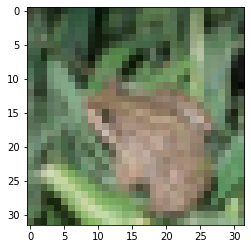

In [27]:
import matplotlib.pyplot as plt
plt.imshow(x_test[4])

In [3]:
# 코드 def 만들기

def vgg_block(n_filter, X, blocks=2):
    H = tf.keras.layers.Conv2D(n_filter, kernel_size=3, padding="same")(X)
    H = tf.keras.layers.BatchNormalization()(H)
    H = tf.keras.layers.Activation("swish")(H)
    H = tf.keras.layers.Conv2D(n_filter, kernel_size=3, padding="same")(H)
    H = tf.keras.layers.BatchNormalization()(H)
    H = tf.keras.layers.Activation("swish")(H)
    if blocks == 3:
        H = tf.keras.layers.Conv2D(n_filter, kernel_size=3, padding="same")(H)
        H = tf.keras.layers.BatchNormalization()(H)
        H = tf.keras.layers.Activation("swish")(H)
    return H

In [4]:
X = tf.keras.Input(shape=[32, 32, 3])

H = vgg_block(64, X, 2)
H = tf.keras.layers.MaxPool2D()(H)

H = vgg_block(128, H, 2)
H = tf.keras.layers.MaxPool2D()(H)

H = vgg_block(256, H, 3)
H = tf.keras.layers.MaxPool2D()(H)

H = vgg_block(512, H, 3)
H = tf.keras.layers.MaxPool2D()(H)

H = vgg_block(512, H, 3)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(4096)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)
H = tf.keras.layers.Dense(4096)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)
H = tf.keras.layers.Dense(1000)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)
Y = tf.keras.layers.Dense(10, activation="softmax")(H)

model = tf.keras.Model(X, Y)
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0     

---

### GoogLeNet

<img src="./img/c21.png" width=100% height=100%>

모델 중간 중간 병렬 처리가 되어 있는 것이 특징  
병렬로 처리된 결과들을 다음에 사용함   

- 처음 VGG 와 같이 만들어 져 1등, VGG는 2등을 함
- 하지만, 초창기에는 VGG가 더 많이 사용됨
- 이후 계속 버젼 업을 하여 inception net 으로 발전함 (개선)

기울기 소실 문제를 방지하기 위해 분류기를 중간중간에 더 추가해 놨다.

GoogLeNet - Inception module (병렬구조)

<img src="./img/c22.png" width=80% height=80%>

<img src="./img/c23.png" width=80% height=80%>

---

### ResNet

- Residual Block

<img src="./img/c24.png" width=100% height=100%>

- 블럭 하나 하나가, VGG 에서 사용했던 블럭과 같은 구조
- VGG : 깊게 쌓기에 실패 했다.
- ResNet 은 깊게 쌓기를 성공 : 중간중간 둥근 화살표
- conv 2번 한것을 더했다 (tf.keras.layers.add)

- 100 layer 이상의 깊은 망
- skip connection
- residual learning building block
- pre-activation 구조
- 깊은 망 학습의 표준 모델이 됨.

### ResNet - residual block

- 깊은 망을 쌓을때 도움이 되는 개념

<img src="./img/c25.png" width=80% height=80%>

- residual block 개념을 conv 에만 쓰는게 아니라, 조건이 된다면 dense 에서도 써도 된다.

In [2]:
# 2개짜리 블럭
def residual_block_2(n_filter, X):
    H = tf.keras.layers.Conv2D(n_filter, kernel_size=3, padding="same")(X)
    H = tf.keras.layers.BatchNormalization()(H)
    H = tf.keras.layers.Activation("swish")(H) # 논문에 relu 대신 swish 사용
    H = tf.keras.layers.Conv2D(n_filter, kernel_size=3, padding="same")(H)
    H = tf.keras.layers.BatchNormalization()(H)
    H = tf.keras.layers.Add()([X, H]) # add 를 하고 난 후 relu 하는게 핵심
    H = tf.keras.layers.Activation("swish")(H)
    return H

# 3개 짜리 블럭
def residual_block_3(n_filter, X):
    H = tf.keras.layers.Conv2D(n_filter // 4, kernel_size=1, padding="same")(X)
    H = tf.keras.layers.BatchNormalization()(H)
    H = tf.keras.layers.Activation("swish")(H)
    H = tf.keras.layers.Conv2D(n_filter // 4, kernel_size=3, padding="same")(H)
    H = tf.keras.layers.BatchNormalization()(H)
    H = tf.keras.layers.Activation("swish")(H)
    H = tf.keras.layers.Conv2D(n_filter, kernel_size=1, padding="same")(H)
    H = tf.keras.layers.BatchNormalization()(H)
    H = tf.keras.layers.Add()([X, H]) # add 를 하고 난 후 relu 하는게 핵심
    H = tf.keras.layers.Activation("swish")(H)
    return H

<img src="./img/c26.png" width=80% height=80%>

In [ ]:
# resnet 34 만들어보기

X = tf.keras.Input(shape=[32, 32, 3])
H = tf.keras.layers.Conv2D(64, kernel_size=7, padding="same")(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)
H = tf.keras.layers.MaxPool2D(pool_size=3)(H)

# 64 * 3
for i in range(3):
    H = residual_block_2(64, H)
H = tf.keras.layers.MaxPool2D()(H)
# 64 채널 outpout, but 밑에서 128로 받아야 함. (채널 수 때문에 에러가 남)

# 128 * 4
for i in range(4):
    H = residual_block_2(128, H)
H = tf.keras.layers.MaxPool2D()(H)

# 256 * 6
for i in range(6):
    H = residual_block_2(256, H)
H = tf.keras.layers.MaxPool2D()(H)

# 512 * 3
for i in range(3):
    H = residual_block_2(512, H)

H = tf.keras.layers.GlobalAveragePooling2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(1000)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)
Y = tf.keras.layers.Dense(10, activation="softmax")(H)

model = tf.keras.Model(X, Y)
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")

model.summary()


중간 채널이 안맞기 때문에 에러가 난다. 따라서, 채널을 맞춰 줘야 한다.

In [8]:
## 채널 맞춰주기

# 2개짜리 블럭
def residual_block_2(n_filter, X):
    H = tf.keras.layers.Conv2D(n_filter, kernel_size=3, padding="same")(X)
    H = tf.keras.layers.BatchNormalization()(H)
    H = tf.keras.layers.Activation("swish")(H) # 논문에 relu 대신 swish 사용
    H = tf.keras.layers.Conv2D(n_filter, kernel_size=3, padding="same")(H)
    H = tf.keras.layers.BatchNormalization()(H)
    # 간단한 해결방법 (회피)
    if X.shape[-1] == n_filter:
        H = tf.keras.layers.Add()([X, H]) # add 를 하고 난 후 relu 하는게 핵심
    H = tf.keras.layers.Activation("swish")(H)
    return H

In [9]:
# resnet 34 만들어보기

X = tf.keras.Input(shape=[32, 32, 3])
H = tf.keras.layers.Conv2D(64, kernel_size=7, padding="same")(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)
H = tf.keras.layers.MaxPool2D(pool_size=3)(H)

# 64 * 3
for i in range(3):
    H = residual_block_2(64, H)
H = tf.keras.layers.MaxPool2D()(H)
# 64 채널 outpout, but 밑에서 128로 받아야 함. (채널 수 때문에 에러가 남)

# 128 * 4
for i in range(4):
    H = residual_block_2(128, H)
H = tf.keras.layers.MaxPool2D()(H)

# 256 * 6
for i in range(6):
    H = residual_block_2(256, H)
H = tf.keras.layers.MaxPool2D()(H)

# 512 * 3
for i in range(3):
    H = residual_block_2(512, H)

H = tf.keras.layers.GlobalAveragePooling2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(1000)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)
Y = tf.keras.layers.Dense(10, activation="softmax")(H)

model = tf.keras.Model(X, Y)
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")

model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_51 (Conv2D)              (None, 32, 32, 64)   9472        input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_52 (BatchNo (None, 32, 32, 64)   256         conv2d_51[0][0]                  
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 32, 32, 64)   0           batch_normalization_52[0][0]     
____________________________________________________________________________________________

In [12]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
352/352 [==============================] - 29s 81ms/step - loss: 1.3993 - accuracy: 0.4864 - val_loss: 2.0482 - val_accuracy: 0.3190
Epoch 2/10
352/352 [==============================] - 40s 115ms/step - loss: 1.0543 - accuracy: 0.6228 - val_loss: 1.3105 - val_accuracy: 0.5410
Epoch 3/10
352/352 [==============================] - 39s 112ms/step - loss: 0.8667 - accuracy: 0.6938 - val_loss: 1.2870 - val_accuracy: 0.6258
Epoch 4/10
352/352 [==============================] - 38s 108ms/step - loss: 0.7325 - accuracy: 0.7453 - val_loss: 1.0994 - val_accuracy: 0.6346
Epoch 5/10
352/352 [==============================] - 39s 110ms/step - loss: 0.6184 - accuracy: 0.7876 - val_loss: 2.0502 - val_accuracy: 0.5026
Epoch 6/10
352/352 [==============================] - 32s 90ms/step - loss: 0.5292 - accuracy: 0.8192 - val_loss: 1.5396 - val_accuracy: 0.6224
Epoch 7/10
352/352 [==============================] - 34s 97ms/step - loss: 0.4486 - accuracy: 0.8463 - val_loss: 1.2958 - val_accur

---

In [15]:
### 3블럭 채널 맞추기 

def residual_block_3(n_filter, X):
    H = tf.keras.layers.Conv2D(n_filter // 4, kernel_size=1, padding="same")(X)
    H = tf.keras.layers.BatchNormalization()(H)
    H = tf.keras.layers.Activation("swish")(H)
    H = tf.keras.layers.Conv2D(n_filter // 4, kernel_size=3, padding="same")(H)
    H = tf.keras.layers.BatchNormalization()(H)
    H = tf.keras.layers.Activation("swish")(H)
    H = tf.keras.layers.Conv2D(n_filter, kernel_size=1, padding="same")(H)
    H = tf.keras.layers.BatchNormalization()(H)

    # 진정한 해결 방법
    if X.shape[-1] != n_filter:
        # 1x1 컨볼루션을 통해 채널 수를 맞춰 준 후 더한다. BN은 하면 안됨! 
        X = tf.keras.layers.Conv2D(n_filter, kernel_size=1, padding="same")(X)
    
    H = tf.keras.layers.Add()([X, H])
    H = tf.keras.layers.Activation("swish")(H)
    return H

In [16]:
# resnet 152

X = tf.keras.Input(shape=[32, 32, 3])
H = tf.keras.layers.Conv2D(64, kernel_size=7, padding="same")(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)
H = tf.keras.layers.MaxPool2D(pool_size=3)(H)

# residual_block_3 256 * 3
for i in range(3):
    H = residual_block_3(256, H)
H = tf.keras.layers.MaxPool2D()(H)

# residual_block_3 512 * 8
for i in range(8):
    H = residual_block_3(512, H)
H = tf.keras.layers.MaxPool2D()(H)

# residual_block_3 1024 * 36
for i in range(36):
    H = residual_block_3(1024, H)
H = tf.keras.layers.MaxPool2D()(H)

# residual_block_3 2048 * 3
for i in range(3):
    H = residual_block_3(2048, H)

H = tf.keras.layers.GlobalAveragePooling2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(1000)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)
Y = tf.keras.layers.Dense(10, activation="softmax")(H)

model = tf.keras.Model(X, Y)
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_394 (Conv2D)             (None, 32, 32, 64)   9472        input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_398 (BatchN (None, 32, 32, 64)   256         conv2d_394[0][0]                 
__________________________________________________________________________________________________
activation_396 (Activation)     (None, 32, 32, 64)   0           batch_normalization_398[0][0]    
____________________________________________________________________________________________

In [17]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
352/352 [==============================] - 255s 576ms/step - loss: 1.9153 - accuracy: 0.3008 - val_loss: 580.6890 - val_accuracy: 0.2940
Epoch 2/10
352/352 [==============================] - 179s 508ms/step - loss: 1.4530 - accuracy: 0.4874 - val_loss: 2.1100 - val_accuracy: 0.3968
Epoch 3/10
352/352 [==============================] - 143s 407ms/step - loss: 1.2282 - accuracy: 0.5747 - val_loss: 2.1940 - val_accuracy: 0.3596
Epoch 4/10
352/352 [==============================] - 137s 390ms/step - loss: 0.9574 - accuracy: 0.6641 - val_loss: 1.2094 - val_accuracy: 0.5860
Epoch 5/10
352/352 [==============================] - 157s 448ms/step - loss: 0.7773 - accuracy: 0.7310 - val_loss: 0.9652 - val_accuracy: 0.6762
Epoch 6/10
352/352 [==============================] - 147s 418ms/step - loss: 0.6381 - accuracy: 0.7763 - val_loss: 1.4069 - val_accuracy: 0.5810
Epoch 7/10
352/352 [==============================] - 163s 464ms/step - loss: 0.5323 - accuracy: 0.8156 - val_loss: 0.8901

In [ ]:
cnn 4 2:17

In [ ]:
<img src="./img/c26.png" width=80% height=80%>